<a href="https://colab.research.google.com/github/CyborgMKH/1st-Repo/blob/master/DiabetesPrediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

# Getting data from GitHub repository

In [ ]:
url='https://raw.githubusercontent.com/ISMT-Coders/Datasets/main/diabetes.csv'
# url='https://raw.githubusercontent.com/ISMT-Coders/Datasets/main/diabetes1.csv'
df=pd.read_csv(url)
# df_updated=df.copy()

In [ ]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# #selecting the relevent features for prediction system
# selected_features = ['race','gender','age','weight','time_in_hospital','num_lab_procedures','num_medications','number_outpatient','number_emergency',
#                      'number_inpatient','number_diagnoses','max_glu_serum','A1Cresult','insulin','change','diabetesMed','readmitted']
# print(selected_features)

In [ ]:
# selected_values = df[selected_features].values
# print(selected_values)

In [ ]:
# # Convert the list of values to a DataFrame
# selected_df = pd.DataFrame(selected_values, columns=selected_features)

In [ ]:
# selected_df.isnull().sum()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# selected_df

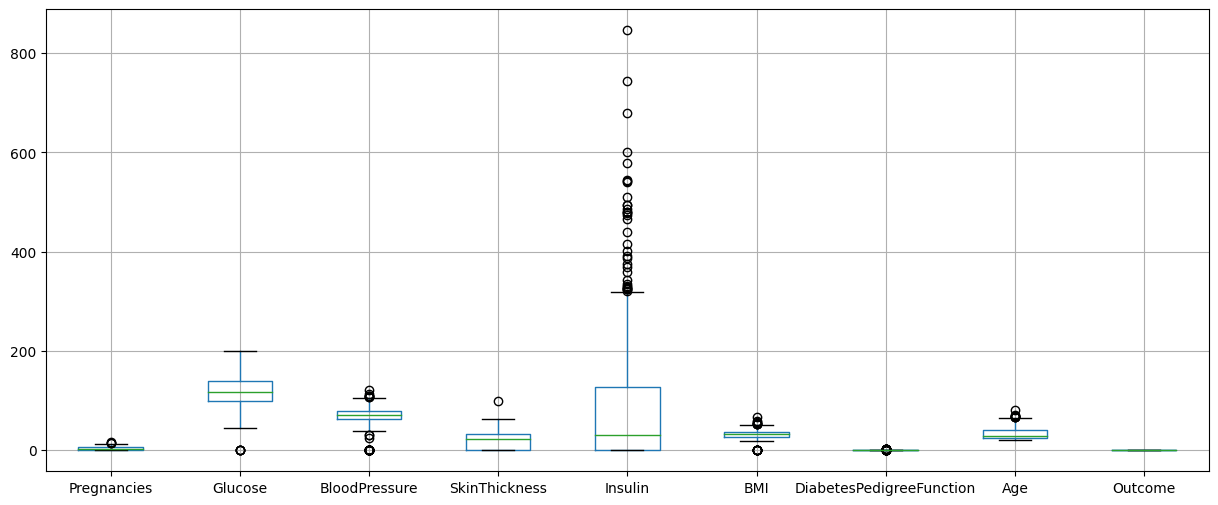

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# import matplotlib.pyplot as plt

# # Create an instance of LabelEncoder
# label_encoder = LabelEncoder()

# # Iterate over each column in the DataFrame
# for column in selected_df.columns:
#     # Check if the column is categorical (object or string type)
#     if selected_df[column].dtype == 'object':
#         # Label encode the categorical column
#         selected_df[column] = label_encoder.fit_transform(selected_df[column])

# # Create the box plot
# selected_df.boxplot(figsize=(30, 6))
# plt.show()

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

#Create an instance of LabelIncoder
label_encoder = LabelEncoder()

#Iterate over each column in the DataFrame
for column in df.columns:
  if df[column].dtype == 'object':
    #Label encode the categorical column
    df[column] = label_encoder.fit_transform(df[column])

# Create the box plot
df.boxplot(figsize=(15, 6))
plt.show()

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# def removeOutliers(col):
#     q1 = col.quantile(0.25)
#     q3 = col.quantile(0.75)
#     iqr = q3 - q1
#     upper_limit = q3 + 1.5 * iqr
#     lower_limit = q1 - 1.5 * iqr
#     return col[(col >= lower_limit) & (col <= upper_limit)]

# # Create a new DataFrame to store the trimmed values
# new_df = pd.DataFrame()

# # Iterate over each column in selected_df
# for column in selected_df.columns:
#     new_df[column] = removeOutliers(selected_df[column])

# # Print the new DataFrame
# print(new_df)


def removeOutliers(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    return col[(col >= lower_limit) & (col <= upper_limit)]

# Create a new DataFrame to store the trimmed values
new_df = pd.DataFrame()

# Iterate over each column in selected_df
for column in df.columns:
    new_df[column] = removeOutliers(df[column])

# Print the new DataFrame
print(new_df)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      0.0  33.6   
1              1     85.0           66.0           29.0      0.0  26.6   
2              8    183.0           64.0            0.0      0.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      0.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            0.0      0.0  30.1   
767            1     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  
1                

In [ ]:
len(df)

768

In [ ]:
len(new_df)

764

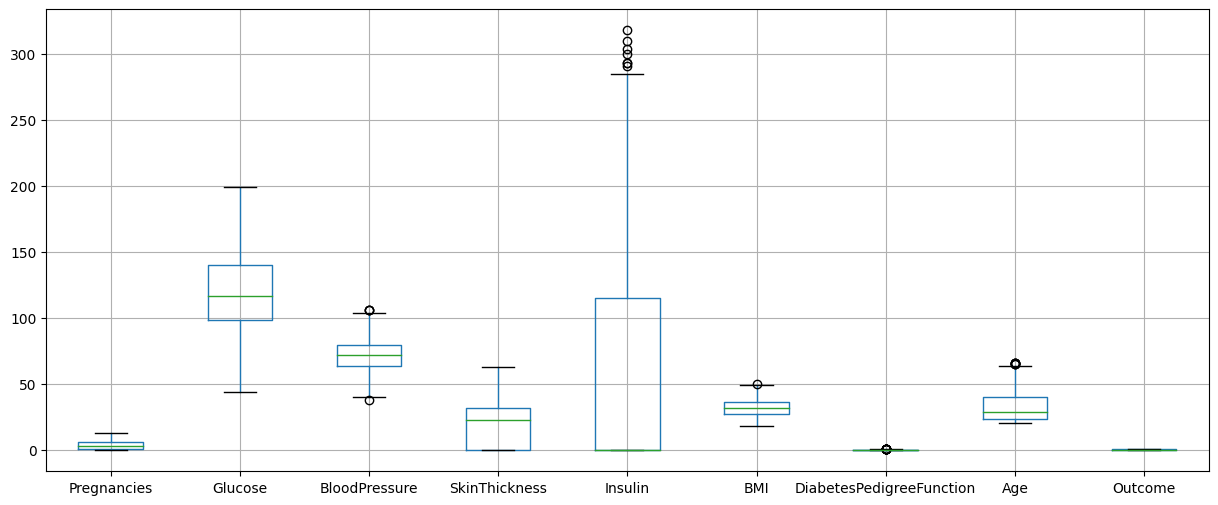

In [ ]:
new_df.boxplot(figsize=(15, 6))
plt.show()

In [ ]:
new_df.isnull().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

In [ ]:
# Replace missing values with mean values
mean_values = new_df.mean()
updated_df = new_df.fillna(mean_values)

# Print the DataFrame after replacing missing values
print(updated_df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      0.0  33.6   
1              1     85.0           66.0           29.0      0.0  26.6   
2              8    183.0           64.0            0.0      0.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      0.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            0.0      0.0  30.1   
767            1     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                    0.627000  50.0        1  
1                

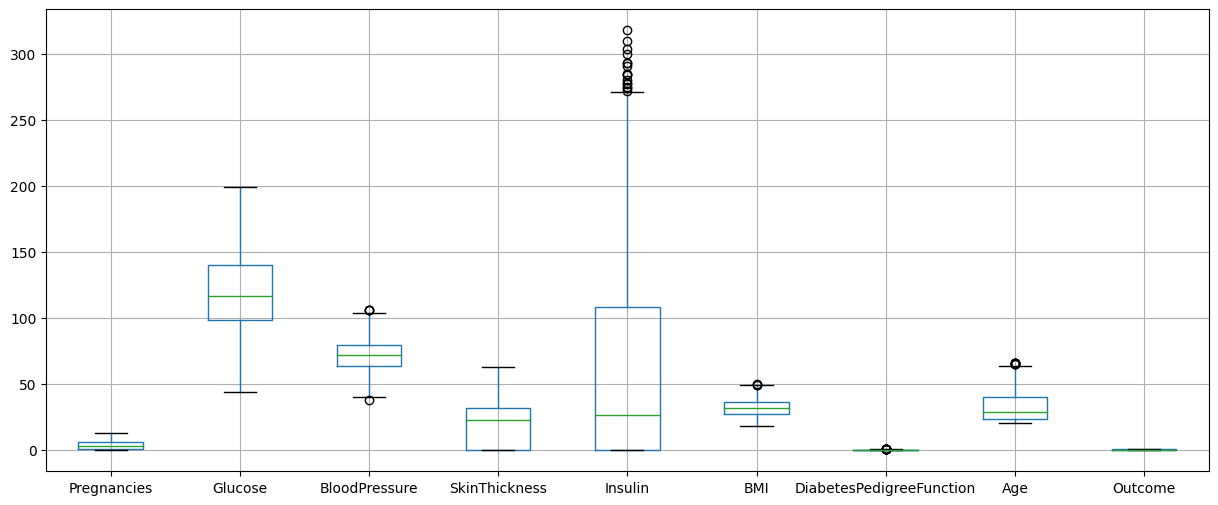

In [ ]:
updated_df.boxplot(figsize=(15, 6))
plt.show()

In [ ]:
updated_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 26.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.4 MB/s eta 0:00:0

In [ ]:
from pycaret.classification import *
s=setup(data=updated_df,target='Outcome',session_id=123)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(764, 9)"
4,Transformed data shape,"(764, 9)"
5,Transformed train set shape,"(534, 9)"
6,Transformed test set shape,"(230, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7790,0.0000,0.5898,0.7341,0.6469,0.4901,0.5011,0.0440
lda,Linear Discriminant Analysis,0.7753,0.8311,0.5898,0.7230,0.6429,0.4828,0.4925,0.0600
lr,Logistic Regression,0.7734,0.8302,0.5895,0.7202,0.6422,0.4796,0.4892,0.3270
rf,Random Forest Classifier,0.7660,0.8302,0.6000,0.6952,0.6387,0.4677,0.4745,0.5680
et,Extra Trees Classifier,0.7621,0.8276,0.5673,0.6930,0.6193,0.4499,0.4576,0.7410
xgboost,Extreme Gradient Boosting,0.7528,0.8147,0.5994,0.6681,0.6253,0.4424,0.4485,0.1150
qda,Quadratic Discriminant Analysis,0.7526,0.8085,0.5886,0.6657,0.6209,0.4392,0.4439,0.1040
ada,Ada Boost Classifier,0.7510,0.7928,0.5892,0.6658,0.6212,0.4371,0.4421,0.3720
gbc,Gradient Boosting Classifier,0.7510,0.8194,0.5842,0.6719,0.6175,0.4356,0.4431,0.3400
nb,Naive Bayes,0.7490,0.8152,0.6319,0.6470,0.6339,0.4442,0.4482,0.0350


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
x=updated_df.drop(columns='Outcome')
y=updated_df.Outcome

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (611, 8)
Shape of test : (153, 8)
Shape of y_train : (611,)
Shape of y_test : (153,)


In [ ]:
from sklearn import linear_model

In [ ]:
lr=linear_model.LogisticRegression()

In [ ]:
logisticModel=lr.fit(X_train,y_train)

In [ ]:
y_pred=logisticModel.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [ ]:
y_test

461    0
149    0
745    0
530    0
403    0
      ..
495    0
647    1
510    1
334    0
442    0
Name: Outcome, Length: 153, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       125
           1       0.41      0.82      0.55        28

    accuracy                           0.75       153
   macro avg       0.68      0.78      0.69       153
weighted avg       0.85      0.75      0.78       153



In [ ]:
from sklearn import metrics

In [ ]:
cm=metrics.confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[92,  5],
       [33, 23]])

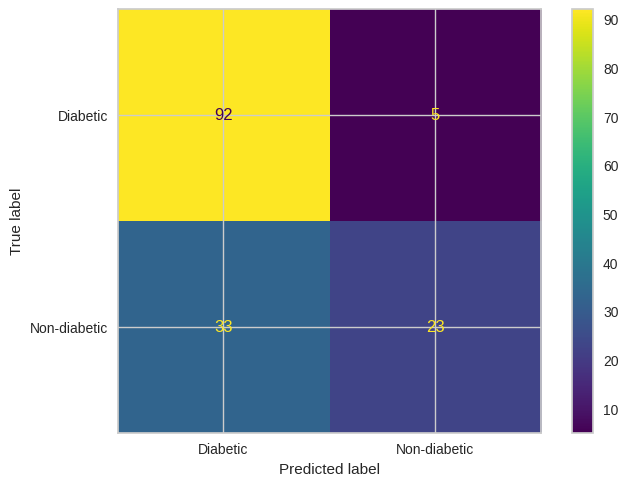

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Define the display labels
display_labels = ['Diabetic', 'Non-diabetic']  # Replace with your class labels

# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

# Plot the confusion matrix
cm_display.plot()

# Show the plot
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(learning_rate=0.1)

In [ ]:
gbmodel=gb.fit(X_train,y_train)

In [ ]:
y_pred=gbmodel.predict(X_test)

In [ ]:
y_pred[0]

0

In [ ]:
y_pred
y_test

461    0
149    0
745    0
530    0
403    0
      ..
495    0
647    1
510    1
334    0
442    0
Name: Outcome, Length: 153, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dtmodel=dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
y_pred


array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        97
           1       0.53      0.45      0.49        56

    accuracy                           0.65       153
   macro avg       0.62      0.61      0.61       153
weighted avg       0.64      0.65      0.65       153



In [ ]:
cm=metrics.confusion_matrix(y_test,y_pred)

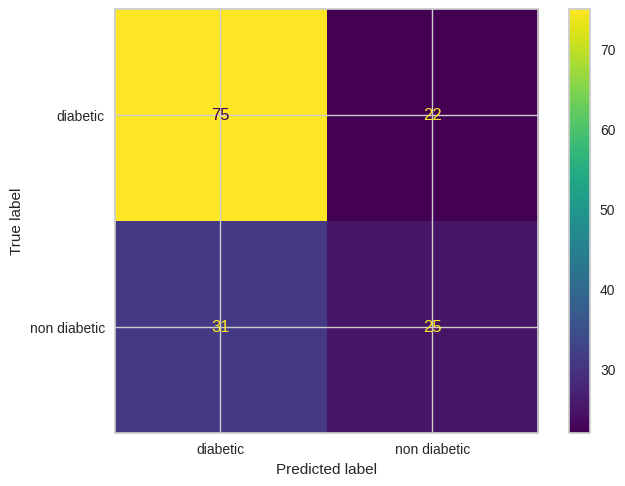

In [ ]:
# Define the display labels
display_labels = ['diabetic','non diabetic']  # Replace with your class labels

# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

# Plot the confusion matrix
cm_display.plot()

# Show the plot
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
rfmodel=rf.fit(X_train,y_train)
y_pred=rfmodel.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83        97
           1       0.79      0.48      0.60        56

    accuracy                           0.76       153
   macro avg       0.78      0.70      0.72       153
weighted avg       0.77      0.76      0.75       153



In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
models=[]
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Decision Tree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('XG Boost',GradientBoostingClassifier()))

In [ ]:
models

[('Logistic Regression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('Decision Tree',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_samples_leaf=1,
                         min_samples_split=2, min_weight_fraction_leaf=0.0,
                         random_state=None, splitter='best')),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('Naive Bayes', GaussianNB(priors=None, var_

In [ ]:
for name,model in models:
  kfold=KFold(n_splits=10,random_state=7,shuffle=True)
  cross_val_sc=cross_val_score(model,x,y,scoring='accuracy',cv=kfold)
  print(f'{name                          }\t{cross_val_sc.mean()}')

Logistic Regression	0.7658065618591935
Decision Tree	0.6989747095010252
KNN	0.7266062884483937
Naive Bayes	0.7475393028024608
Random Forest	0.7528366370471634
XG Boost	0.7553827751196173


# Grid Search
# More Data Analysis
# Streamlit


# Making Prediction System

In [ ]:
# separating the data and labels
X = updated_df.drop(columns = 'Outcome', axis=1)
Y = updated_df['Outcome']

In [ ]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      0.0  33.6   
1              1     85.0           66.0           29.0      0.0  26.6   
2              8    183.0           64.0            0.0      0.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      0.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            0.0      0.0  30.1   
767            1     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  
0                    0.627000  50.0  
1                    0.351000  31.0

In [ ]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 764, dtype: int64


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.67550897  0.86983183 -0.01956601 ...  0.22181961  0.80516798
   1.56274527]
 [-0.85047818 -1.20368871 -0.55719511 ... -0.8701091  -0.3229002
  -0.15837418]
 [ 1.28590383  2.02178769 -0.73640481 ... -1.3848755   0.98909214
  -0.06778895]
 ...
 [ 0.37031154 -0.01881983 -0.01956601 ... -0.93250503 -0.75614378
  -0.24895942]
 [-0.85047818  0.14574529 -1.09482421 ... -0.32414474 -0.33107461
   1.29098957]
 [-0.85047818 -0.94038452 -0.19877571 ... -0.2773478  -0.47003953
  -0.88305606]]


In [ ]:
X = standardized_data
Y = updated_df['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.67550897  0.86983183 -0.01956601 ...  0.22181961  0.80516798
   1.56274527]
 [-0.85047818 -1.20368871 -0.55719511 ... -0.8701091  -0.3229002
  -0.15837418]
 [ 1.28590383  2.02178769 -0.73640481 ... -1.3848755   0.98909214
  -0.06778895]
 ...
 [ 0.37031154 -0.01881983 -0.01956601 ... -0.93250503 -0.75614378
  -0.24895942]
 [-0.85047818  0.14574529 -1.09482421 ... -0.32414474 -0.33107461
   1.29098957]
 [-0.85047818 -0.94038452 -0.19877571 ... -0.2773478  -0.47003953
  -0.88305606]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 764, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(764, 8) (611, 8) (153, 8)


In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7659574468085106


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.803921568627451


In [ ]:
# Create an empty array to store the inputs
input_data_as_numpy_array = np.array([])

# Get inputs from the user
pregnancies = float(input("Enter number of pregnancies: "))
glucose = float(input("Enter glucose level: "))
blood_pressure = float(input("Enter blood pressure: "))
skin_thickness = float(input("Enter skin thickness: "))
insulin = float(input("Enter insulin level: "))
bmi = float(input("Enter BMI: "))
diabetes_pedigree = float(input("Enter diabetes pedigree function: "))
age = float(input("Enter age: "))

# Add the inputs to the data array
input_data_as_numpy_array = np.append(input_data_as_numpy_array, pregnancies)
input_data_as_numpy_array = np.append(input_data_as_numpy_array, glucose)
input_data_as_numpy_array = np.append(input_data_as_numpy_array, blood_pressure)
input_data_as_numpy_array = np.append(input_data_as_numpy_array, skin_thickness)
input_data_as_numpy_array = np.append(input_data_as_numpy_array, insulin)
input_data_as_numpy_array = np.append(input_data_as_numpy_array, bmi)
input_data_as_numpy_array = np.append(input_data_as_numpy_array, diabetes_pedigree)
input_data_as_numpy_array = np.append(input_data_as_numpy_array, age)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
#print(std_data)

prediction = classifier.predict(std_data)
# print(prediction)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')


Enter number of pregnancies: 55
Enter glucose level: 85
Enter blood pressure: 82
Enter skin thickness: 35
Enter insulin level: 55
Enter BMI: 0.5
Enter diabetes pedigree function: 0.5
Enter age: 70
The person is not diabetic


In [ ]:
# from sklearn import svm
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression

# model_params = {
#     'svm': {
#         'model': svm.SVC(gamma='auto'),
#         'params' : {
#             'C': [1,10,20],
#             'kernel': ['rbf','linear']
#         }
#     },
#     'random_forest': {
#         'model': RandomForestClassifier(),
#         'params' : {
#             'n_estimators': [1,5,10]
#         }
#     },
#     'logistic_regression' : {
#         'model': LogisticRegression(solver='liblinear',multi_class='auto'),
#         'params': {
#             'C': [1,5,10]
#         }
#     }
# }

In [ ]:
# scores = []

# for model_name, mp in model_params.items():
#     clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
#     clf.fit(iris.data, iris.target)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_
#     })

# df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
# df